In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. 데이터 로딩 및 BMI 계산
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
data["BMI"] = data["Weight"] / (data["Height"] ** 2)

# 2. 비만 여부 이진 레이블 생성
obese_labels = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
data["is_obese"] = data["NObeyesdad"].apply(lambda x: 1 if x in obese_labels else 0)

# 3. 범주형 변수 인코딩
categorical_cols = [
    "Gender", "CALC", "FAVC", "SCC", "SMOKE",
    "family_history_with_overweight", "CAEC", "MTRANS"
]
data_encoded = data.copy()
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

# 4. 피처 및 스케일링
features = [
    "Age", "Gender", "Height", "Weight", "CALC", "FAVC", "FCVC", "NCP",
    "SCC", "SMOKE", "CH2O", "family_history_with_overweight", "FAF",
    "TUE", "CAEC", "MTRANS", "BMI"
]
scaler = StandardScaler()
X = scaler.fit_transform(data_encoded[features])
y = data_encoded["is_obese"]

# 5. 학습 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. 로지스틱 회귀 모델 훈련
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [116]:
importance_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": clf.coef_[0]
}).sort_values("Coefficient", key=abs, ascending=False)
print(importance_df)


                           Feature  Coefficient
16                             BMI     6.728803
3                           Weight     5.330155
2                           Height    -1.681570
1                           Gender    -0.676716
5                             FAVC     0.454413
8                              SCC    -0.222645
11  family_history_with_overweight     0.213158
12                             FAF     0.184197
9                            SMOKE     0.155401
13                             TUE    -0.108804
14                            CAEC     0.105478
10                            CH2O     0.098849
15                          MTRANS     0.093433
6                             FCVC    -0.075133
0                              Age    -0.065090
4                             CALC    -0.046287
7                              NCP    -0.009116


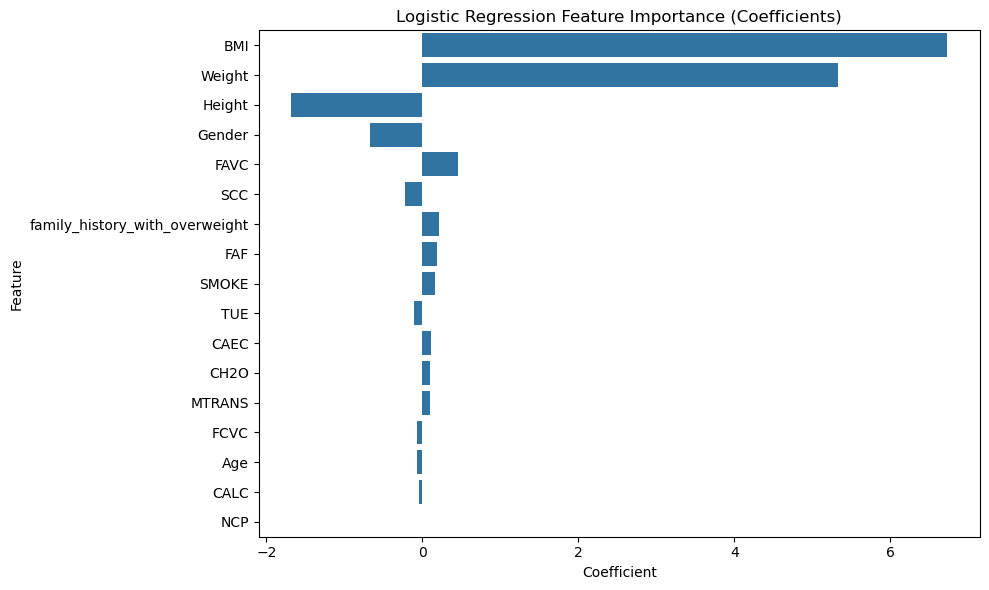

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=importance_df)
plt.title("Logistic Regression Feature Importance (Coefficients)")
plt.tight_layout()
plt.show()


In [124]:
data["is_obese"].value_counts(normalize=True)

is_obese
0    0.539555
1    0.460445
Name: proportion, dtype: float64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [128]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("✅ 정확도:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ 정확도: 0.9952718676122931

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.99      0.99      0.99       195

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



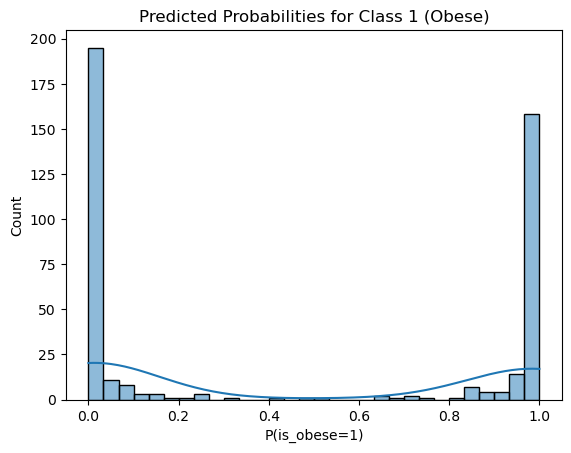

In [130]:
import seaborn as sns

y_proba = clf.predict_proba(X_test)[:, 1]
sns.histplot(y_proba, bins=30, kde=True)
plt.title("Predicted Probabilities for Class 1 (Obese)")
plt.xlabel("P(is_obese=1)")
plt.show()


In [132]:
# BMI 없이 로지스틱 회귀
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. 데이터 로딩 및 BMI 계산
data = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
data["BMI"] = data["Weight"] / (data["Height"] ** 2)

# 2. 비만 여부 이진 레이블 생성
obese_labels = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
data["is_obese"] = data["NObeyesdad"].apply(lambda x: 1 if x in obese_labels else 0)

# 3. 인코딩
categorical_cols = [
    "Gender", "CALC", "FAVC", "SCC", "SMOKE",
    "family_history_with_overweight", "CAEC", "MTRANS"
]
data_encoded = data.copy()
for col in categorical_cols:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

# 4. BMI 없이 피처 정의
features_no_bmi = [
    "Age", "Gender", "Height", "Weight", "CALC", "FAVC", "FCVC", "NCP",
    "SCC", "SMOKE", "CH2O", "family_history_with_overweight", "FAF",
    "TUE", "CAEC", "MTRANS"
]

# 5. 스케일링 및 분할
scaler_no_bmi = StandardScaler()
X_no_bmi = scaler_no_bmi.fit_transform(data_encoded[features_no_bmi])
y = data_encoded["is_obese"]

X_train, X_test, y_train, y_test = train_test_split(X_no_bmi, y, test_size=0.2, random_state=42, stratify=y)

# 6. 로지스틱 회귀 학습
clf_no_bmi = LogisticRegression(max_iter=1000, random_state=42)
clf_no_bmi.fit(X_train, y_train)

# 7. 성능 평가
y_pred = clf_no_bmi.predict(X_test)
print("✅ BMI 제외 모델 정확도:", clf_no_bmi.score(X_test, y_test))
print("\n📊 Classification Report (No BMI):\n")
print(classification_report(y_test, y_pred))


✅ BMI 제외 모델 정확도: 0.9929078014184397

📊 Classification Report (No BMI):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       228
           1       0.99      0.99      0.99       195

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



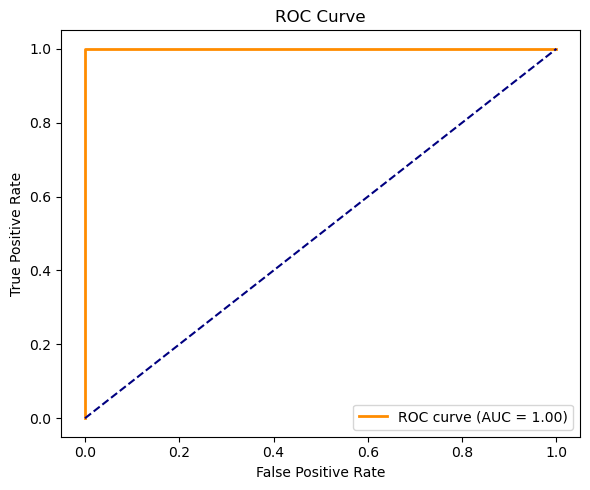

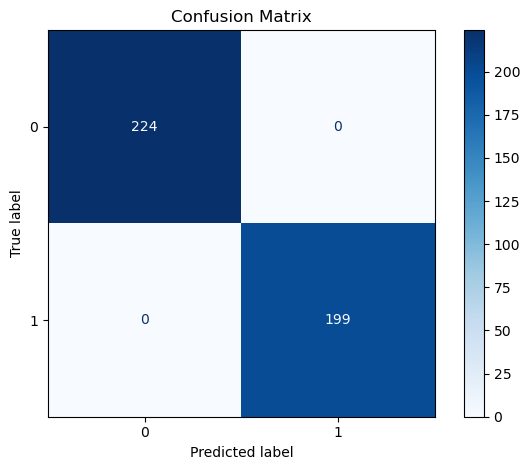

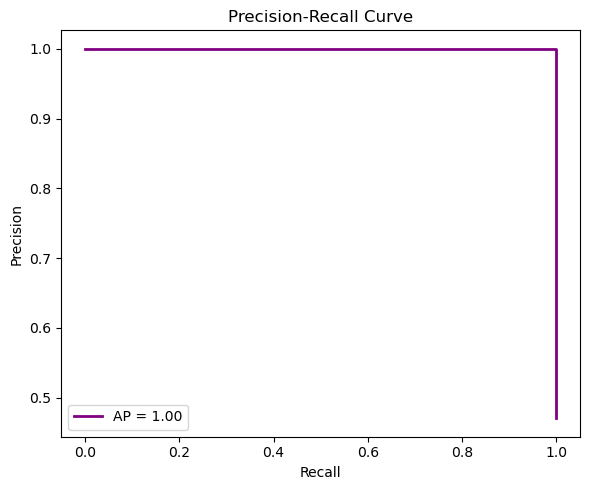

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score

# ROC Curve
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='purple', lw=2, label=f'AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


In [136]:
# 비만 위험도 검사 함수
def predict_obesity_risk(user_input: dict) -> dict:
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    # 인코딩 매핑
    gender_map = {"Male": 1, "Female": 0}
    calc_map = {"Sometimes": 2, "Frequently": 3, "Always": 1, "no": 0}
    favc_map = {"yes": 1, "no": 0}
    scc_map = {"yes": 1, "no": 0}
    smoke_map = {"yes": 1, "no": 0}
    history_map = {"yes": 1, "no": 0}
    caec_map = {"Sometimes": 2, "Frequently": 3, "Always": 1, "no": 0}
    mtrans_map = {
        "Walking": 0, "Bike": 1, "Motorbike": 2,
        "Public_Transportation": 3, "Automobile": 4
    }

    # 벡터 생성
    user_vector = [
        user_input["Age"],
        gender_map[user_input["Gender"]],
        user_input["Height"],
        user_input["Weight"],
        calc_map[user_input["CALC"]],
        favc_map[user_input["FAVC"]],
        user_input["FCVC"],
        user_input["NCP"],
        scc_map[user_input["SCC"]],
        smoke_map[user_input["SMOKE"]],
        user_input["CH2O"],
        history_map[user_input["family_history_with_overweight"]],
        user_input["FAF"],
        user_input["TUE"],
        caec_map[user_input["CAEC"]],
        mtrans_map[user_input["MTRANS"]],
        user_input["Weight"] / (user_input["Height"] ** 2)
    ]

    # 스케일링
    user_scaled = scaler.transform([user_vector])
    prob = clf.predict_proba(user_scaled)[0][1]

    # 해석
    if prob >= 0.9:
        label = "🔴 고위험: 비만 특성과 매우 유사"
    elif prob >= 0.7:
        label = "🟠 중위험: 행동 개입 권장"
    elif prob >= 0.4:
        label = "🟡 경계: 생활습관 개선 권장"
    else:
        label = "🟢 낮은 위험: 현재 상태 유지"

    return {
        "risk_score": round(prob, 4),
        "interpretation": label
    }


In [144]:
user_input = {
    "Age": 28,
    "Gender": "Male",
    "Height": 1.72,
    "Weight": 95,
    "CALC": "Sometimes",
    "FAVC": "yes",
    "FCVC": 1,
    "NCP": 3,
    "SCC": "yes",
    "SMOKE": "no",
    "CH2O": 1,
    "family_history_with_overweight": "yes",
    "FAF": 0,
    "TUE": 2,
    "CAEC": "Frequently",
    "MTRANS": "Automobile"
}

result = predict_obesity_risk(user_input)
print("📊 비만 유사도 점수:", result["risk_score"])
print("📝 해석:", result["interpretation"])


📊 비만 유사도 점수: 0.8146
📝 해석: 🟠 중위험: 행동 개입 권장


/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
